In [1]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style='darkgrid')

In [2]:
df_list = []
folder = 'firmin'

for product_html in os.listdir(folder):
    with open(os.path.join(folder, product_html)) as file:
        soup = BeautifulSoup(file, 'lxml')
        all_divs = soup.find_all('div', class_='product-detail')  
        for val in all_divs:
            category = val.find('p', class_='cat').contents[0].split(':')[-1]
            name = val.find('a', class_='product-name').contents[0]
            price = val.find_all('strong')[1]
            price = price.contents[0].split(':')[1].replace('$','').replace(',','').strip()
          
            df_list.append({'name':name,
                   'category':category,
                   'price':int(price)})
df = pd.DataFrame(df_list, columns=['name','category','price'])    

In [3]:
df

,name,category,price
0,Poisson burec,Aliments / Cuits,900
1,Gracia cake group 0.5 kg,Aliments / Cuits,1200
2,Sac Ã main femme 1 pc 25cm,Fashion femmes,1800
3,Pantalon jean dame,Fashion femmes,1200
4,Sac Ã main femme Lv 1 pc 32cm,Fashion femmes,2500
5,Sac Ã main femme Lv 1 pc 32cm 2,Fashion femmes,2500
6,Sac Ã main pour femme LV 1 pc 22 cm,Fashion femmes,1700
7,jupe salopette,Fashion femmes,1500
8,Sac Ã main femme 1 pc 22cm,Fashion femmes,2000
9,pantalon femme patte d'Ã©lÃ©phant,Fashion femmes,1300


In [4]:
df.head()

,name,category,price
0,Poisson burec,Aliments / Cuits,900
1,Gracia cake group 0.5 kg,Aliments / Cuits,1200
2,Sac Ã main femme 1 pc 25cm,Fashion femmes,1800
3,Pantalon jean dame,Fashion femmes,1200
4,Sac Ã main femme Lv 1 pc 32cm,Fashion femmes,2500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      29 non-null     object
 1   category  29 non-null     object
 2   price     29 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 824.0+ bytes


In [6]:
# Number of unique vals per column
df.nunique()

name        29
category     5
price       20
dtype: int64

In [7]:
# descriptive stats of the price col
df['price'].describe()

count       29.00000
mean     13350.00000
std      23142.53968
min        600.00000
25%       1300.00000
50%       1800.00000
75%      16000.00000
max      87000.00000
Name: price, dtype: float64

In [8]:
df.head()

,name,category,price
0,Poisson burec,Aliments / Cuits,900
1,Gracia cake group 0.5 kg,Aliments / Cuits,1200
2,Sac Ã main femme 1 pc 25cm,Fashion femmes,1800
3,Pantalon jean dame,Fashion femmes,1200
4,Sac Ã main femme Lv 1 pc 32cm,Fashion femmes,2500


#### on average what is the mean price per category of product

In [9]:
avg_price = df.groupby('category').mean()
avg_price

,price
category,
Aliments / Cuits,1050.00
Aliments / Non cuits,2400.00
Fashion femmes,1812.50
Fashion hommes,1043.75
TÃ©lÃ©phone,44375.00


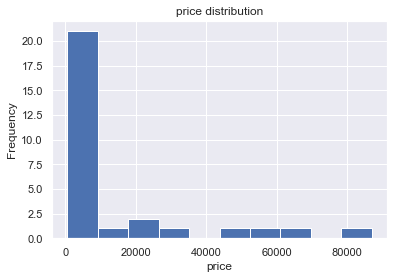

In [10]:
df['price'].plot(kind='hist')
plt.title('price distribution')
plt.xlabel('price');

In [11]:
# filtering to get the max price.
df.iloc[df['price'].idxmax()]

name        iPhone 11 max 64GB
category           TÃ©lÃ©phone
price                    87000
Name: 26, dtype: object

In [12]:
df.iloc[df['price'].idxmin()]

name        Ceinture pour homme Goldenlion
category                    Fashion hommes
price                                  600
Name: 10, dtype: object

- On average, phones cost the most as compared to other product categories.
- On average, the cooked foods are the products that cost the least amount.
- The most expensive product is the iPhone 11 max 64GB, costing 87000.
- The cheapest product is the Ceinture pour homme Goldenlion costing 600.

#### How are the products distributed per category

In [13]:
df.groupby('category').count()['name']

category
 Aliments / Cuits        2
 Aliments / Non cuits    3
 Fashion femmes          8
 Fashion hommes          8
 TÃ©lÃ©phone             8
Name: name, dtype: int64

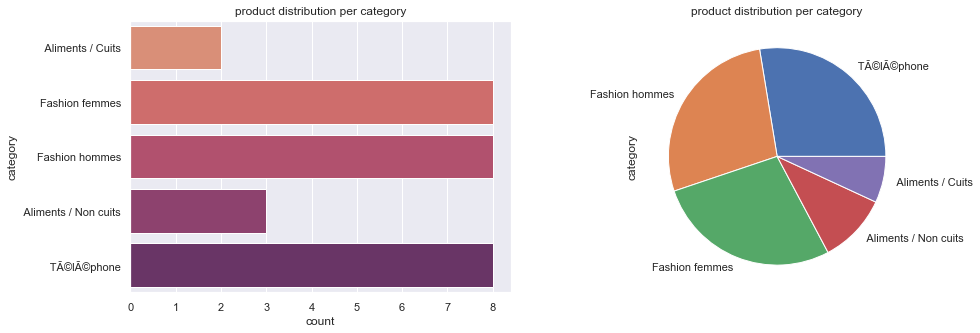

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y='category',data=df, palette='flare')
plt.title('product distribution per category')
plt.subplot(1,2,2)
df['category'].value_counts().plot(kind='pie')
plt.title('product distribution per category');

- As shown above, its the phones and fashion categories that have the highest amount of products (8).
- The cooked food categories has the lowest(whyy nigga,, are these foods even fresh by now :)